<a href="https://colab.research.google.com/github/alberto-ng/392_final/blob/master/CPSC392_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Packages

In [ ]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import statsmodels.api as sm
from plotnine import *


from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso

from sklearn import metrics 
from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt

%precision %.7g
%matplotlib inline


#Import Data

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/phamvlai/CPSC392_Project/master/vgsales.csv")
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
data.shape

(16598, 11)

# Transform Data

In [ ]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
data_clean = data.dropna()


In [ ]:
data_clean.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

# GOAT

In [ ]:
data_group = data_clean.groupby('Publisher')['Global_Sales'].sum().reset_index()

In [ ]:
data_group.head()

,Publisher,Global_Sales
0,10TACLE Studios,0.11
1,1C Company,0.10
2,20th Century Fox Video Games,1.94
3,2D Boy,0.04
4,3DO,10.12


In [ ]:
top_pub = data_group.nlargest(20, ['Global_Sales']) 

In [ ]:
pub = top_pub['Publisher']

In [ ]:
data_top = data_clean[data_clean['Publisher'].isin(pub)]

In [ ]:
data_top.shape

(10232, 11)

In [ ]:
dups_pub = data_top.pivot_table(index=['Publisher'], aggfunc='size')

In [ ]:
print(dups_pub)

Publisher
Activision                                 966
Atari                                      347
Bethesda Softworks                          69
Capcom                                     376
Disney Interactive Studios                 214
Eidos Interactive                          196
Electronic Arts                           1339
Konami Digital Entertainment               823
LucasArts                                   89
Microsoft Game Studios                     189
Midway Games                               196
Namco Bandai Games                         928
Nintendo                                   696
Sega                                       632
Sony Computer Entertainment                682
Square Enix                                231
THQ                                        712
Take-Two Interactive                       412
Ubisoft                                    918
Warner Bros. Interactive Entertainment     217
dtype: int64


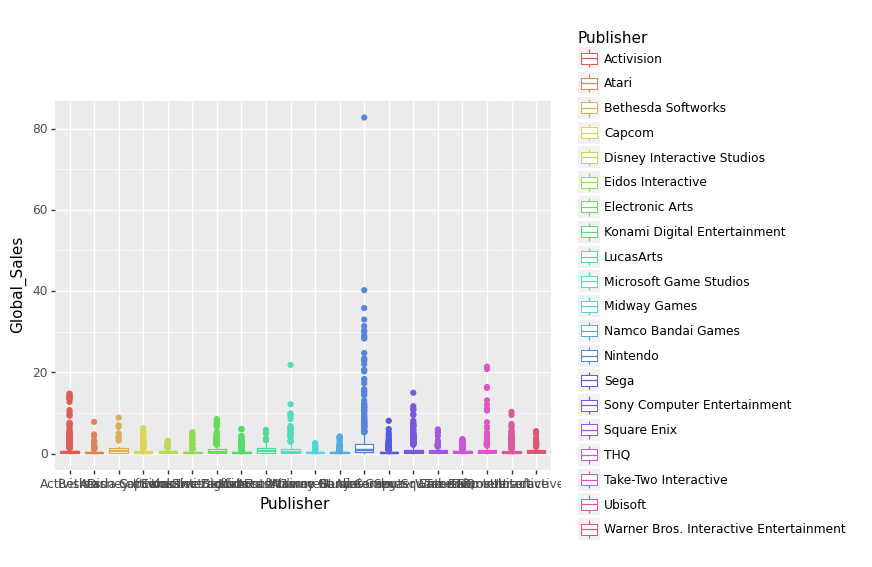

<ggplot: (-9223363303260970331)>

In [ ]:
(ggplot(data_top, aes("Publisher", "Global_Sales", color = "Publisher")) + geom_boxplot())

In [ ]:
dummies = pd.get_dummies(data_top.Platform, drop_first = True)
data_dum = pd.concat([data_top,dummies], axis=1)


In [ ]:
dummies2 = pd.get_dummies(data_top.Genre, drop_first = True)
data_dum = pd.concat([data_dum,dummies2], axis=1)

In [ ]:
dummies3 = pd.get_dummies(data_top.Publisher, drop_first = True)
data_dum = pd.concat([data_dum,dummies3], axis=1)

In [ ]:
data_final = data_dum.drop(['Rank','Name','Platform','Genre','Publisher','Other_Sales','EU_Sales'], axis=1)

In [ ]:
X = data_final.loc[:, data_final.columns != 'Global_Sales']
Y = data_final["Global_Sales"]

In [ ]:
LR_Model = LinearRegression()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
X_train.head()

zscore = StandardScaler()
zscore.fit(X_train)
Xz_train = zscore.transform(X_train)
Xz_test = zscore.transform(X_test)

In [ ]:
LR_Model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = LR_Model.predict(X_test)
y_pred[1:10]

array([0.11320267, 0.41055033, 0.22729183, 0.0673196 , 0.13906031,
       1.53784465, 0.11037675, 0.72098794, 0.39171623])

In [ ]:
true_vs_pred = pd.DataFrame({"predict": y_pred,"trueV": y_test})
true_vs_pred.head()

,predict,trueV
1500,1.237756,1.31
10143,0.113203,0.11
6214,0.410550,0.28
6922,0.227292,0.24
11489,0.067320,0.08


In [ ]:
mean_squared_error(y_test,y_pred)

0.1237611

In [ ]:
r2_score(y_test,y_pred)

0.9321856

In [ ]:
coefficients = pd.DataFrame({"Coef":LR_Model.coef_,
              "Name": X})
coefficients = coefficients.append({"Coef": LR_Model.intercept_,
                    "Name": "intercept"}, ignore_index = True)

In [ ]:
coefficients

,Coef,Name
0,0.009961,"(Y, e, a, r)"
1,1.563122,"(N, A, _, S, a, l, e, s)"
2,1.384405,"(J, P, _, S, a, l, e, s)"
3,0.266845,"(3, D, O)"
4,0.120345,"(3, D, S)"
5,0.136584,"(D, C)"
6,0.153438,"(D, S)"
7,-0.246884,"(G, B)"
8,0.132174,"(G, B, A)"
9,0.088499,"(G, C)"


In [ ]:
best_var = coefficients.nlargest(30, ['Coef']) 

In [ ]:
best_var

,Coef,Name
1,1.563122,"(N, A, _, S, a, l, e, s)"
2,1.384405,"(J, P, _, S, a, l, e, s)"
18,0.557279,"(P, S, 4)"
17,0.339208,"(P, S, 3)"
11,0.283605,"(G, G)"
14,0.276921,"(P, C)"
3,0.266845,"(3, D, O)"
24,0.265332,"(W, S)"
16,0.260429,"(P, S, 2)"
22,0.224192,"(S, C, D)"


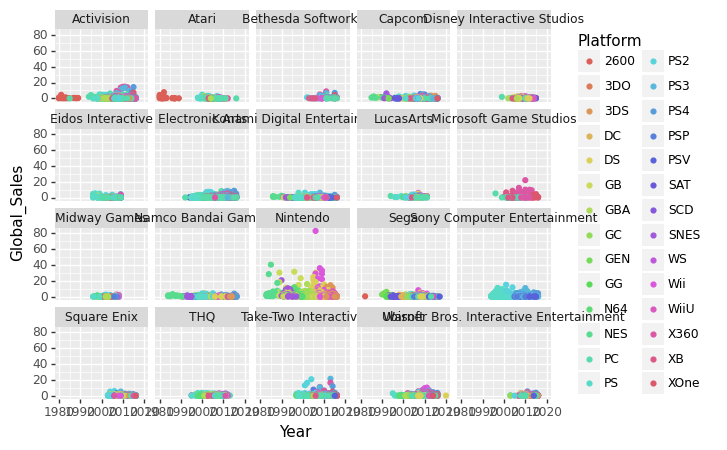

<ggplot: (8733587887066)>

In [ ]:
(ggplot(data_top, aes("Year", "Global_Sales", color = "Platform")) + geom_point()) + facet_wrap('~Publisher')

The answer to my question of GOAT Publisher is Besthesda Softwork. Not only does my coefficients prove this, but I can see from the gg plot that Besthesda has relatively less games produced than the ones with higher global sales. As they produced less games with higher global sales for each, as compared to Nintendo who produced more games overall, with few having extremely high global sales.

#Genres & Platform Connection

In [ ]:
data_cluster = data_dum.drop(['Rank','Name','Platform','Year','Genre','Publisher','NA_Sales','JP_Sales','Other_Sales','EU_Sales'], axis=1)

In [ ]:
data_cluster.shape

(10232, 57)

In [ ]:
hac = AgglomerativeClustering(n_clusters = 10,
                               affinity = "cosine",
                              linkage = "average")

hac.fit(data_cluster)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=10)

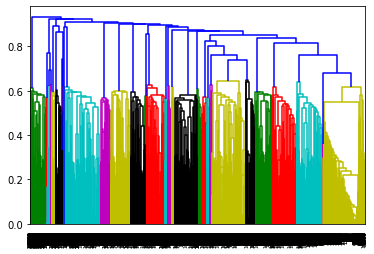

In [ ]:
dendro = sch.dendrogram(sch.linkage(data_cluster, metric = "cosine", method='average'))

In [ ]:
membership = hac.labels_

data_dum.shape

(10232, 68)

In [ ]:
membership.shape

(10232,)

In [ ]:
data_dum["cluster"] = membership

In [ ]:
silhouette_score(X,membership)

-0.3103224

In [ ]:
cols = []
count = 1
for column in data_dum.columns:
    if column == 'Platform':
        cols.append(f'Platform_{count}')
        count+=1
        continue
    cols.append(column)
data_dum.columns = cols

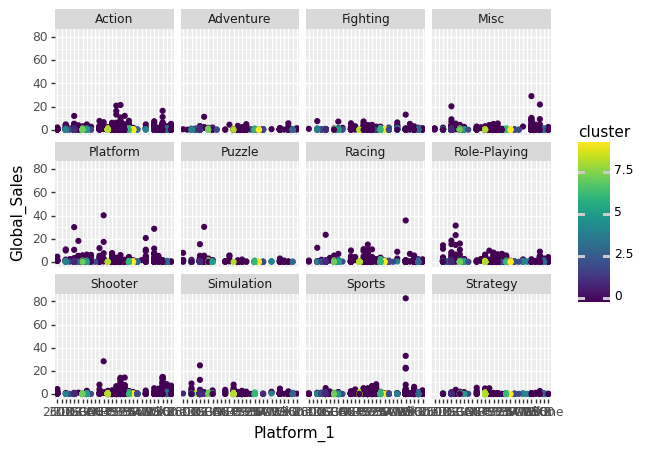

<ggplot: (8733582213026)>

In [ ]:
(ggplot(data_dum) + aes('Platform_1','Global_Sales',color = 'cluster')) + geom_point(aes(color = "cluster")) + facet_wrap('~Genre')

There is no connection between genres and platform that show results in global sales. While the dendrogram show distinct groups, the silhouette score indicates the objects were not well matched. In addition, the gg plot shows no distinct cluster, other than the most common, as a factor in global sales.

#Platform Impact on Global Sales

In [ ]:
dummies_G = pd.get_dummies(data_top.Platform, drop_first = True)
data_Genre = pd.concat([data_top,dummies_G], axis=1)

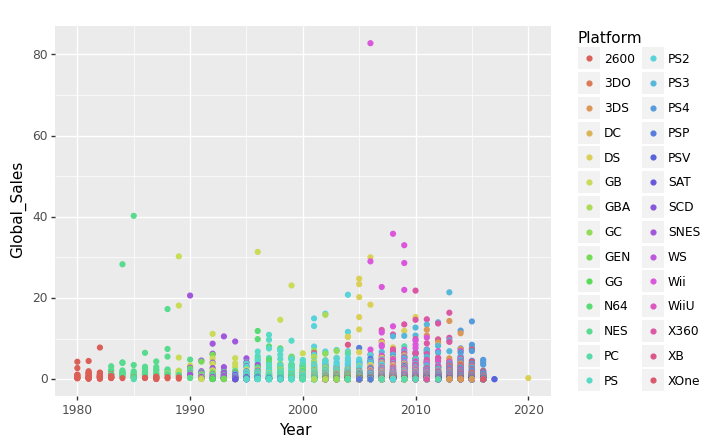

<ggplot: (8733587322502)>

In [ ]:
(ggplot(data_top) + aes('Year','Global_Sales')) + geom_point(aes(color = "Platform")) 

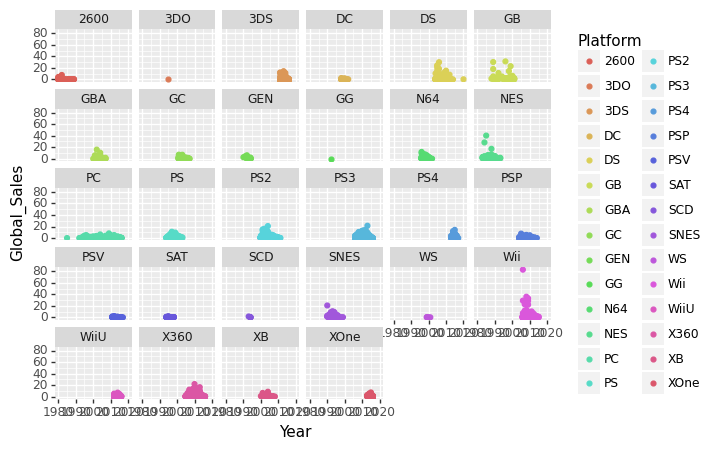

<ggplot: (-9223363303272892342)>

In [ ]:
(ggplot(data_top) + aes('Year','Global_Sales')) + geom_point(aes(color = "Platform"))  + facet_wrap('~Platform')

In [ ]:
data_Genre = data_Genre.drop(['Rank','Name','Platform','Year','Genre','Publisher','NA_Sales','JP_Sales','Other_Sales','EU_Sales'], axis=1)

In [ ]:
X = data_Genre.loc[:, data_Genre.columns != 'Global_Sales']
y = data_Genre["Global_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)


In [ ]:
rr = Ridge()

rr.fit(X_train,y_train)

print("TRAIN: ", mean_absolute_error(y_train, rr.predict(X_train)))
print("TEST : ", mean_absolute_error(y_test, rr.predict(X_test)))

TRAIN:  0.7399681631317703
TEST :  0.7230000319540457


In [ ]:
coefficients = pd.DataFrame({"Coef":rr.coef_,
              "Name":X})
coefficients = coefficients.append({"Coef": rr.intercept_, "Name": "intercept"}, ignore_index = True)

best_plat = coefficients.nlargest(10, ['Coef']) 

In [ ]:
best_plat

,Coef,Name
10,2.213451,"(N, E, S)"
4,2.137718,"(G, B)"
27,0.869668,intercept
15,0.406814,"(P, S, 4)"
20,0.385328,"(S, N, E, S)"
22,0.164885,"(W, i, i)"
24,0.132686,"(X, 3, 6, 0)"
9,0.120885,"(N, 6, 4)"
14,0.053510,"(P, S, 3)"
26,-0.044902,"(X, O, n, e)"


The answer is that NES is the platform that makes the most impact on global sales. This was determined using the platform dummy variables as well as a ridge regression. Additionally, the gg plot shows that while the Wii had the higher global sales, NES platform games were produced for a longer period, similar to GB, but better global sales.

**Riya Sagar**

**Is there a relationship between the year a game was released and the rank?**

In [ ]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


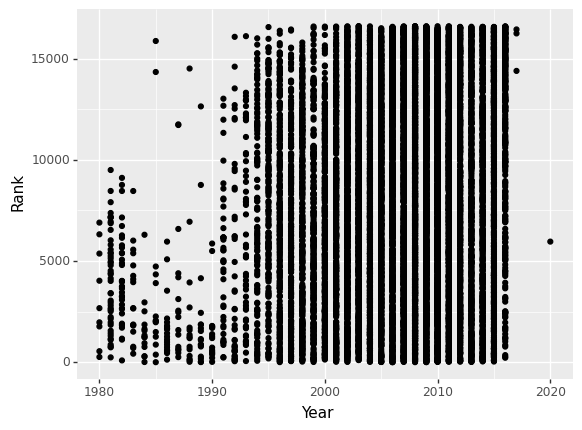

<ggplot: (8733583014320)>

In [ ]:
(ggplot(data_clean, aes("Year", "Rank")) + geom_point())

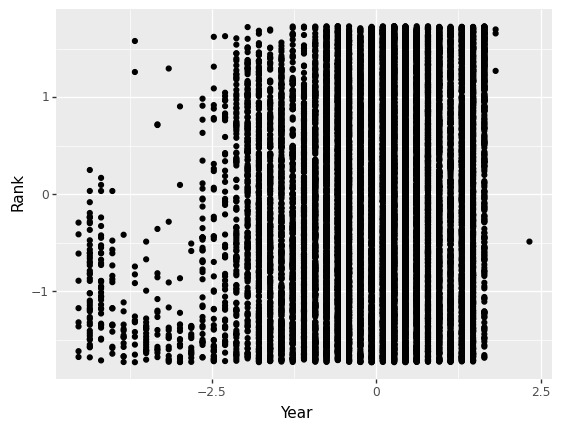

<ggplot: (8733580738312)>

In [ ]:
features = ["Year", "Rank","Global_Sales"]
X = data_clean[features]

z = StandardScaler()
X[["Year", "Rank","Global_Sales"]] = z.fit_transform(X)

(ggplot(X, aes("Year", "Rank")) + geom_point())

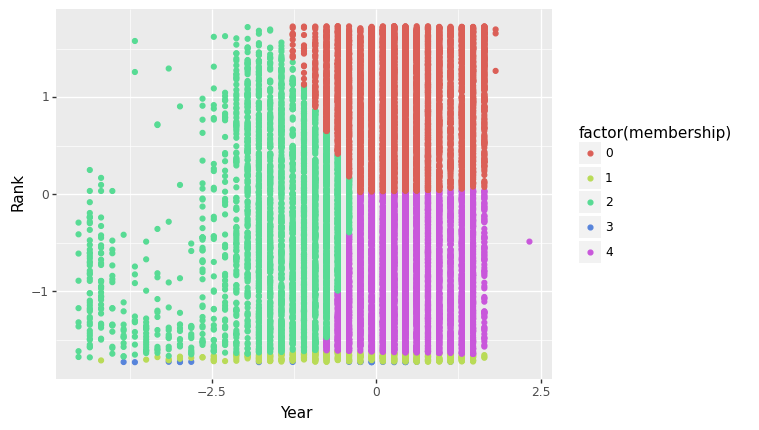

<ggplot: (8733580485682)>

In [ ]:
KM = KMeans(n_clusters = 5)
KM.fit(X)
membership = KM.predict(X)

X["cluster"] = membership

(ggplot(X, aes("Year", "Rank", color = "factor(membership)")) + geom_point())

In [ ]:
silhouette_score(X, membership)

0.6275718

In [ ]:
KM = KMeans(n_clusters = 6)
KM.fit(X)
membership = KM.predict(X)

Xall = X
Xall["cluster"] = membership

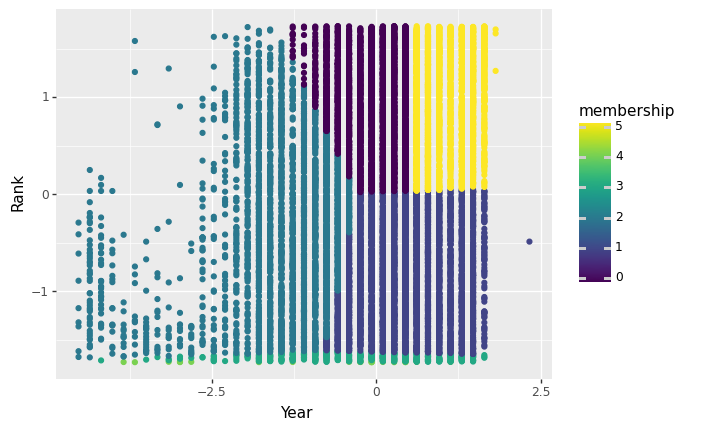

<ggplot: (8733583526278)>

In [ ]:
(ggplot(X, aes("Year", "Rank", color = "membership")) + geom_point())

In [ ]:
silhouette_score(X, membership)

0.5656134

The answer is that there is a relationship between the year a game was released and the rank it stands at. If you look at the ggplot of the  clusters since it also has a higher silhouette score of .61, the green cluster is evenly spread out over the years and performs the best. You see that in the first ci=ouple of years, the ranking was very xporadic since not too many games were released. In the more recent years, there is a very condensed distribution of the games since they are very frequently released now.

**Does the genre of the game affect the sales in specific large countries?**

In [ ]:
genre_type = ('Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy')

data["Genre_Type"] = "Genre_Type"
data.loc[(data["Genre"] == "Action"),"Genre_Type"] = 0
data.loc[(data["Genre"] == "Adventure"),"Genre_Type"] = 1
data.loc[(data["Genre"] == "Fighting"),"Genre_Type"] = 2
data.loc[(data["Genre"] == "Misc"),"Genre_Type"] = 3
data.loc[(data["Genre"] == "Platform"),"Genre_Type"] = 4
data.loc[(data["Genre"] == "Puzzle"),"Genre_Type"] = 5
data.loc[(data["Genre"] == "Racing"),"Genre_Type"] = 6
data.loc[(data["Genre"] == "Role-Playing"),"Genre_Type"] = 7
data.loc[(data["Genre"] == "Shooter"),"Genre_Type"] = 8
data.loc[(data["Genre"] == "Simulation"),"Genre_Type"] = 9
data.loc[(data["Genre"] == "Sports"),"Genre_Type"] = 10
data.loc[(data["Genre"] == "Strategy"),"Genre_Type"] = 11

data_gen = data

data_gen.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_Type
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,10
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,6
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,10
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,7


In [ ]:
feats = ["Genre_Type","NA_Sales", "EU_Sales", "JP_Sales"]

X = data_gen[feats]

In [ ]:
z = StandardScaler()
X[feats] = z.fit_transform(X)

In [ ]:
EM = GaussianMixture(n_components = 5)

EM.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
cluster = EM.predict(X)

silhouette_score(X, cluster)

0.008523498

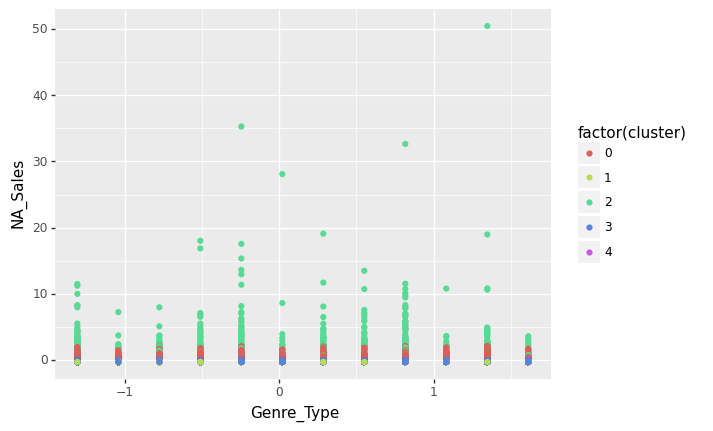

<ggplot: (8733580694564)>

In [ ]:
X["cluster"] = cluster

(ggplot(X, aes(x = "Genre_Type", y = "NA_Sales", color = "factor(cluster)")) + geom_point())

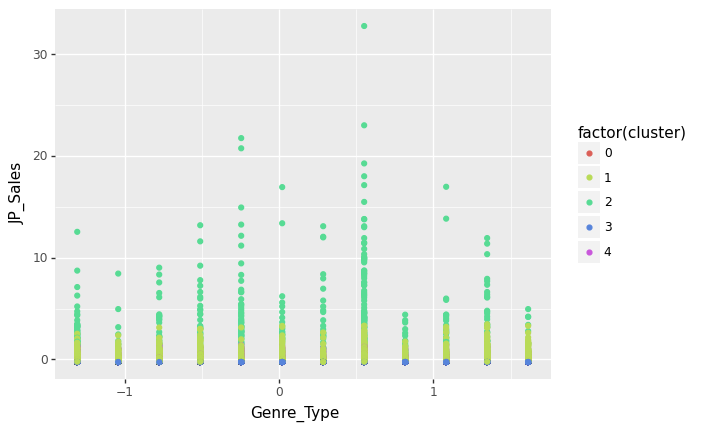

<ggplot: (-9223363303274089237)>

In [ ]:
(ggplot(X, aes(x = "Genre_Type", y = "JP_Sales", color = "factor(cluster)")) + geom_point())

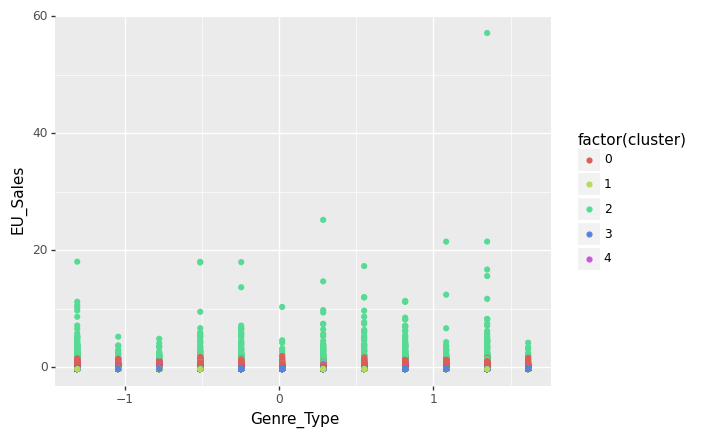

<ggplot: (8733580330767)>

In [ ]:
(ggplot(X, aes(x = "Genre_Type", y = "EU_Sales", color = "factor(cluster)")) + geom_point())

The answer is yes, the genre does affect sales in each of the major regions, but to varying degrees. While looking at the ggplots, it is clear to see which genre is resulting in the highest number of sales, but it is not consistent. This helps us come to the conclusion that there are different preferences per region and from a marketing perspective, we can see which genre of game will result in an economic gain.

**Which factor has the highest impact in determining rank, if any?**

In [ ]:
feat = ["Year","NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]
X = data_clean[feat]
y = data_clean["Rank"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

z = StandardScaler()

X_train[feat] = z.fit_transform(X_train[feat])
X_test[feat] = z.transform(X_test[feat])

X_train.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
4486,0.786354,0.178860,-0.294447,-0.258550,-0.092695
8091,-0.409398,-0.213767,-0.153813,-0.258550,-0.144980
6300,-1.775971,-0.140149,-0.093542,-0.258550,-0.144980
4092,-0.409398,0.105242,-0.033270,-0.258550,-0.197265
2942,1.298819,0.019355,0.328360,-0.096504,0.011876


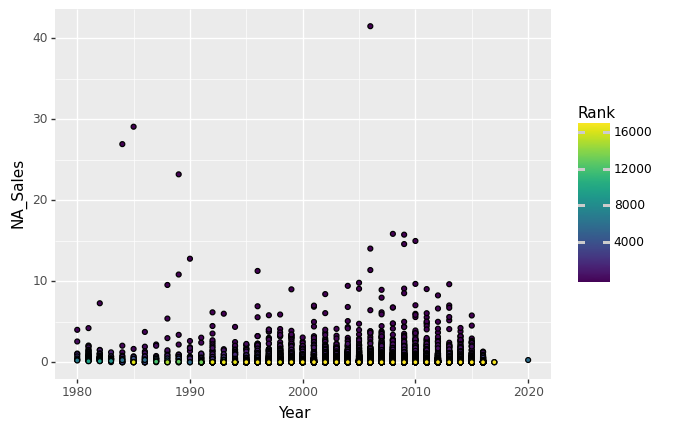

<ggplot: (-9223363303274122159)>

In [ ]:
(ggplot(data_clean,aes(x = "Year", y = "NA_Sales", fill = "Rank")) + geom_point())

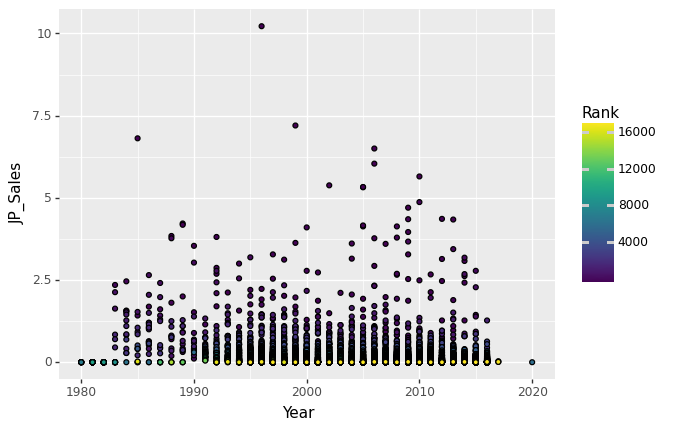

<ggplot: (8733580863892)>

In [ ]:
(ggplot(data_clean,aes(x = "Year", y = "JP_Sales", fill = "Rank")) + geom_point())

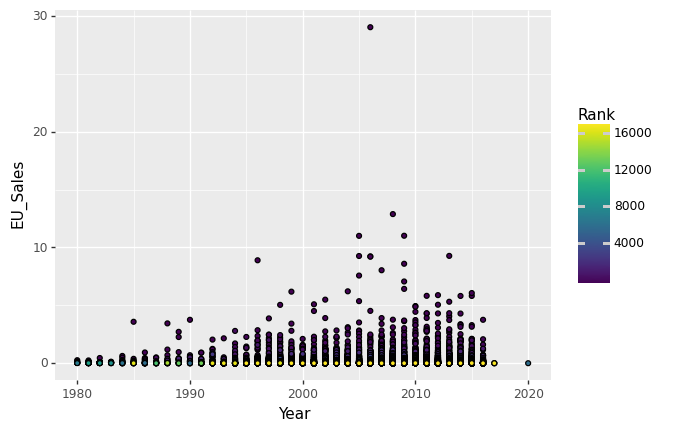

<ggplot: (8733580369942)>

In [ ]:
(ggplot(data_clean,aes(x = "Year", y = "EU_Sales", fill = "Rank")) + geom_point())

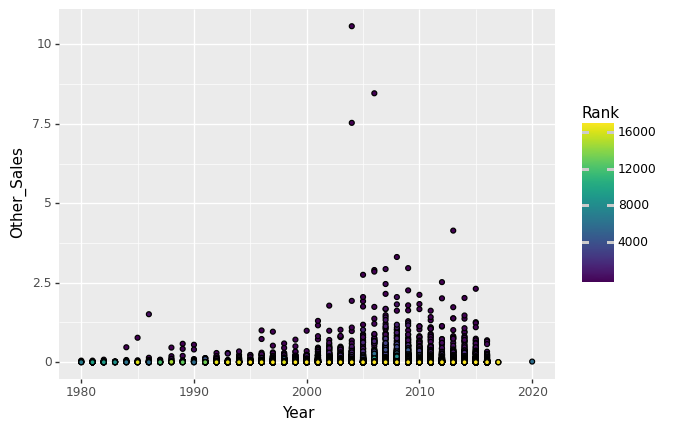

<ggplot: (-9223363303274703991)>

In [ ]:
(ggplot(data_clean,aes(x = "Year", y = "Other_Sales", fill = "Rank")) + geom_point())

In [ ]:
lsr = Lasso()

lsr.fit(X_train,y_train)

print("TRAIN: ", mean_absolute_error(y_train, lsr.predict(X_train)))
print("TEST : ", mean_absolute_error(y_test, lsr.predict(X_test)))

TRAIN:  3591.9442351692473
TEST :  3670.0032151790447


In [ ]:
coefficients = pd.DataFrame({"Coef":lsr.coef_,
              "Name":X})
coefficients = coefficients.append({"Coef": lsr.intercept_, "Name": "intercept"}, ignore_index = True)
coefficients

,Coef,Name
0,734.860447,"(Y, e, a, r)"
1,-818.771664,"(N, A, _, S, a, l, e, s)"
2,-700.298617,"(E, U, _, S, a, l, e, s)"
3,-395.346313,"(J, P, _, S, a, l, e, s)"
4,-459.931546,"(O, t, h, e, r, _, S, a, l, e, s)"
5,8282.552256,intercept


When looking at the individual coefficients the factors that are affecting rank, for every one unit standard deviation increase in year there is an increase of 730 in rank. For every unit increase in NA_Sales, there is a decrease in rank by 761. For every unit increase in EU_Sales, there is a 624 decrease in rank. For every unit increase in JP_Sales, there is a decrease of 412 in rank. For every unit increase in Other_Sales, there is a 564 decrease in rank. Using the coefficients and the ggplots, you can see that how sporadically sparsed the data is specifically in the three major regions. 

Alberto Ng

**How does genre affect global sales, if it does?**

In [ ]:
data_clean.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
data_clean.shape

(16291, 11)

In [ ]:
cutoff = data_clean["Rank"].max()*0.2

data_clean['TopGS'] = 'zzz'
data_clean.loc[(data_clean['Rank'] > cutoff), 'TopGS'] = "0"
data_clean.loc[(data_clean['Rank'] <= cutoff), 'TopGS'] = "1"

data_LR = data_clean

data_LR.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,TopGS
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,1
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,1
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1


In [ ]:
dummy = pd.get_dummies(data_LR.Genre)

data_dum = pd.concat([data_LR, dummy], axis = 1)

data_LR = data_dum.drop(['Name','Platform','Genre','Publisher', 'NA_Sales', 
                         'EU_Sales', 'JP_Sales', 'Other_Sales', "Global_Sales"],
                        axis=1)

new_cutoff = data_clean["Rank"].max()*0.4

data_LR = data_LR[data_LR["Rank"] <= new_cutoff]
data_LR = data_LR.drop(['Rank'], axis=1)

dataLR = data_dum[data_dum["Rank"] <= new_cutoff]
dataLR = dataLR.loc[:,~dataLR.columns.duplicated()]

dataLR.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,TopGS,Action,Adventure,Fighting,Misc,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1,0,0,0,0,0,0,0,0,0,1,0
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1,0,0,0,0,0,0,0,0,0,0,0
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,1,0,0,0,0,0,1,0,0,0,0,0
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,1,0,0,0,0,0,0,0,0,0,1,0
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
X = data_LR.loc[:, data_LR.columns != 'TopGS']
y = data_LR["TopGS"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
LGMod = LogisticRegression()
LGMod = LGMod.fit(X_train, y_train)

GS_pred = LGMod.predict(X_test)
print(accuracy_score(y_test, GS_pred))

0.5038284839203675


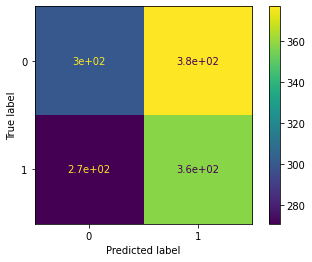

In [ ]:
plot_confusion_matrix(LGMod, X_test, y_test)

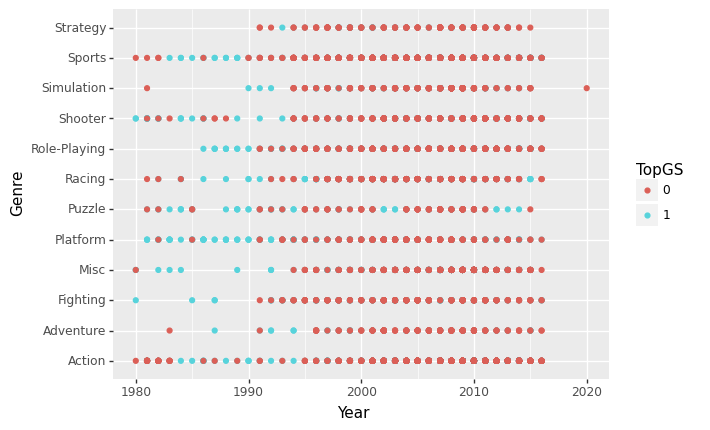

<ggplot: (-9223363303274702925)>

In [ ]:
(ggplot(dataLR, aes("Year", "Genre")) +
geom_point(aes(color = "TopGS")))

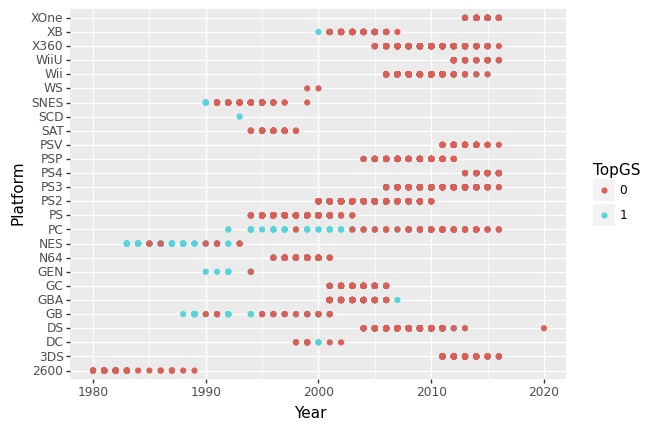

<ggplot: (-9223363303274586343)>

In [ ]:
(ggplot(dataLR, aes("Year", "Platform")) +
geom_point(aes(color = "TopGS")))

When looking at the ggplots and confusion matrix, you can see that there is not a correlation between genre and global sales. The ggplots are colored by TopGS, "0" represents the top 20-40% and the "1" represents the top 20%. The plot confusion matrix and the accuracy score for the matrix of 0.54 shows us that it can not accurately predict the majority of the time.

**Is there a relationship between Global_Sales and the platform?**

In [ ]:
cutoff = data_clean["Rank"].max()*0.2

data_clean['TopGS'] = 'zzz'
data_clean.loc[(data_clean['Rank'] > cutoff), 'TopGS'] = "0"
data_clean.loc[(data_clean['Rank'] <= cutoff), 'TopGS'] = "1"

data_LR = data_clean

In [ ]:
dummy = pd.get_dummies(data_LR.Platform)

data_dum = pd.concat([data_LR, dummy], axis = 1)

data_LASSO = data_dum.drop(['Name','Platform','Genre','Publisher', 'NA_Sales', 
                            'EU_Sales', 'JP_Sales', 'Other_Sales', "Global_Sales"], 
                           axis=1)

new_cutoff = data_clean["Rank"].max()*0.4

data_LASSO = data_LASSO[data_LASSO["Rank"] <= new_cutoff]
data_LASSO = data_LASSO.drop(['Rank'], axis=1)

dataLASSO = data_dum[data_dum["Rank"] <= new_cutoff]

dataLASSO.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,TopGS,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = data_LASSO.loc[:, data_LASSO.columns != 'TopGS']
y = data_LASSO["TopGS"]

In [ ]:
kf = KFold(n_splits = 15)
kf.split(X)

lasso = Lasso() 

zscore = StandardScaler()

train_mae = []
test_mae = []  

In [ ]:
for train_indices, test_indices in kf.split(X):
    X_train = X.iloc[train_indices]
    X_test  = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test  = y.iloc[test_indices]

    zscore.fit(X_train)
    X_test = zscore.transform(X_test)

    model = lasso.fit(X_train, y_train)
    train_mae.append(mean_absolute_error(y_train, lasso.predict(X_train)))
    test_mae.append(mean_absolute_error(y_test, lasso.predict(X_test)))

np.mean(train_mae)

0.4976171

In [ ]:
np.mean(test_mae)

0.5333341

In [ ]:
dataLASSO.Platform[:int(cutoff)].value_counts().nlargest(5)

PS2     493
PS3     421
X360    377
PS      321
Wii     267
Name: Platform, dtype: int64

In [ ]:
dataLASSO = dataLASSO.loc[(dataLASSO.Platform == "PS2") | (dataLASSO.Platform == "PS3") | (dataLASSO.Platform == "X360") | (dataLASSO.Platform == "PS") | (dataLASSO.Platform == "Wii")]
dataLASSO.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,TopGS,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


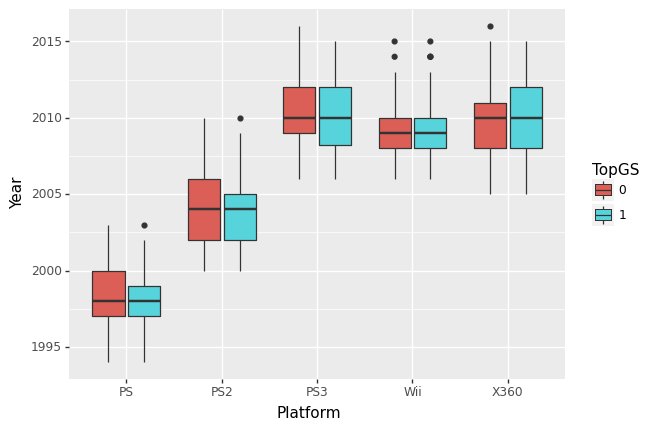

<ggplot: (-9223363303274947461)>

In [ ]:
(ggplot(dataLASSO, aes("Platform", "Year")) +
geom_boxplot(aes(fill = "TopGS")))

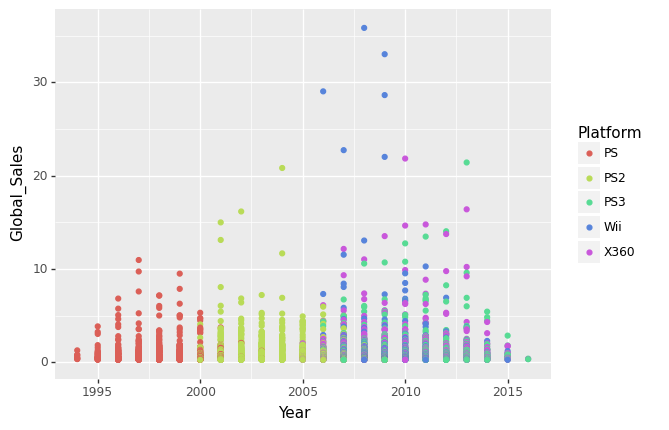

<ggplot: (8733580817423)>

In [ ]:
(ggplot(dataLASSO, aes("Year", "Global_Sales")) +
geom_point(aes(color = "Platform")) +
ylim(0, 36))

While looking at the second ggplot, you can see that WII and X360 perform the best with global sales, in recent years. However, by looking at the mean of the mean absolute error from k-fold cv, the model wasn't overfitted by looking at the train and test results. The highest performing platforms are also the newest out of all 5, which is why their global sales are a lot higher compared to PS and PS.

**Do publishers affect global sales throughout the year?**

In [ ]:
data_EM = data_clean

In [ ]:
#dummy = pd.get_dummies(data_EM.Publisher)

#data_dum = pd.concat([data_EM, dummy], axis = 1)

#data_EM = data_dum.drop(['Name','Platform','Genre'], axis=1)

data_EM = data_EM.drop(['Name','Platform','Genre'], axis=1)

new_cutoff = data_clean["Rank"].max()*0.4

data_EM = data_EM[data_EM["Rank"] <= new_cutoff]
data_EM = data_EM.drop(['Rank'], axis=1)

In [ ]:
data_EM.Publisher[:int(cutoff)].value_counts().nlargest(5)

Electronic Arts                553
Nintendo                       414
Activision                     265
Sony Computer Entertainment    244
Ubisoft                        204
Name: Publisher, dtype: int64

In [ ]:
data_EM['publisher'] = 5
data_EM.loc[(data_EM['Publisher'] == "Electronic Arts"), 'publisher'] = 0
data_EM.loc[(data_EM['Publisher'] == "Nintendo"), 'publisher'] = 1
data_EM.loc[(data_EM['Publisher'] == "Activision"), 'publisher'] = 2
data_EM.loc[(data_EM['Publisher'] == "Sony Computer Entertainment"), 'publisher'] = 3
data_EM.loc[(data_EM['Publisher'] == "Ubisoft"), 'publisher'] = 4

data_EM = data_EM.drop(['Publisher'], axis=1)
data_EM.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,TopGS,publisher
0,2006.0,41.49,29.02,3.77,8.46,82.74,1,1
1,1985.0,29.08,3.58,6.81,0.77,40.24,1,1
2,2008.0,15.85,12.88,3.79,3.31,35.82,1,1
3,2009.0,15.75,11.01,3.28,2.96,33.00,1,1
4,1996.0,11.27,8.89,10.22,1.00,31.37,1,1


In [ ]:
X = data_EM.loc[:]

In [ ]:
EM_Mod = GaussianMixture(n_components = 2)

EM_Mod.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
clusters = EM_Mod.predict(X)
silhouette_score(X, clusters)

0.04282681

In [ ]:
X["clusters"] = clusters

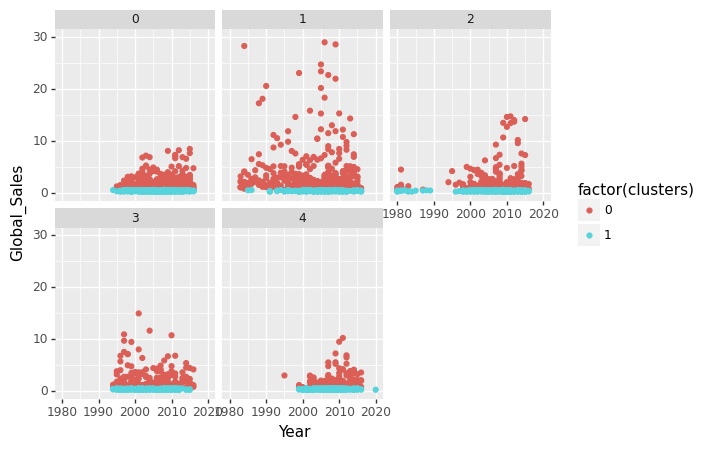

<ggplot: (8733580186863)>

In [ ]:
X = X.loc[(X.publisher == 0) | (X.publisher == 1) | (X.publisher == 2) | (X.publisher == 3) | (X.publisher == 4)]

(ggplot(X, aes("Year", "Global_Sales")) + 
geom_point(aes(color = "factor(clusters)")) +
facet_wrap("publisher") +
ylim(0,30))


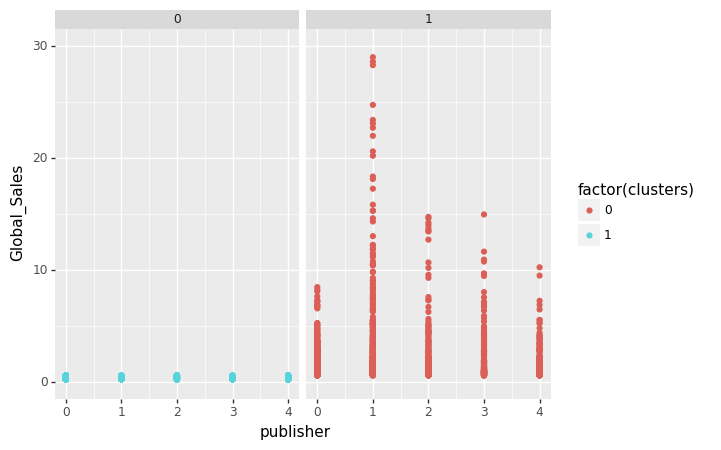

<ggplot: (-9223363303274589124)>

In [ ]:
(ggplot(X, aes("publisher","Global_Sales")) + 
geom_point(aes(color = "factor(clusters)")) +
facet_wrap("TopGS") +
ylim(0, 30))

When looking at the ggplots, you can see that publishers do affect global sales. For the first plot, publisher 1(Nintendo),2(Activision) and 3(Sony) did the best and all dramatically affect global sales. Specifically for publisher 2, you can see that the growth of their global sales over the course of year, the trend is the most interesting and obvious even though it isn't the highest performing. The silhouette score of 0.04 is ahowing us that this model has low cohesion and separation between clusters, but we are still able to identify a relationship.